In [10]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AgglomerativeClustering



## Load raw data

In [11]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country Risk 2019 Data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [12]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000


ValueError: could not convert string to float: 'Albania'

### Plot histogram

Note that distributions for GDP Growth is quite skewed.

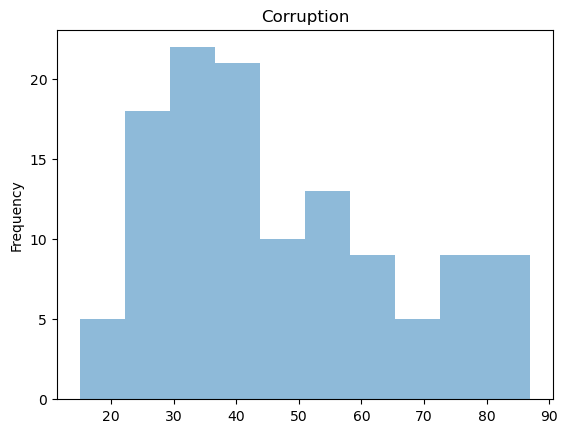

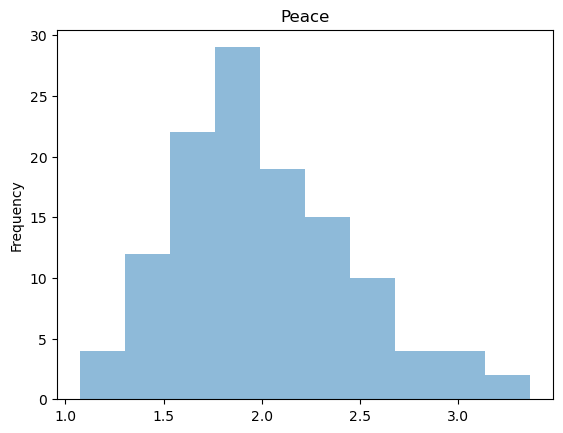

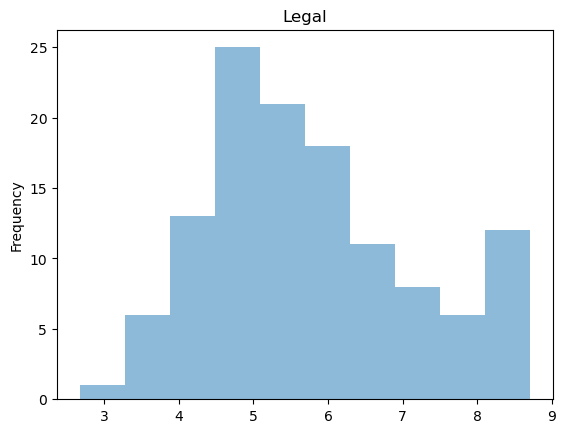

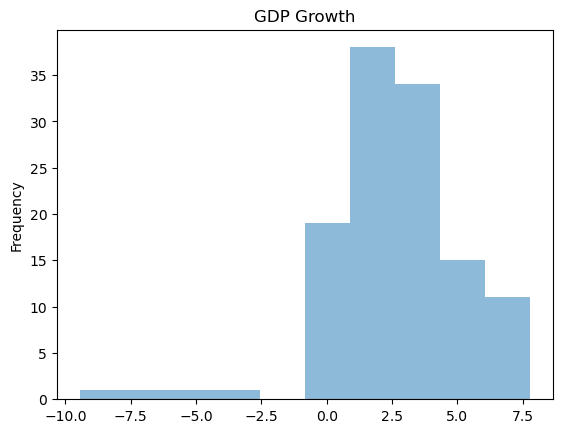

In [13]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [14]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

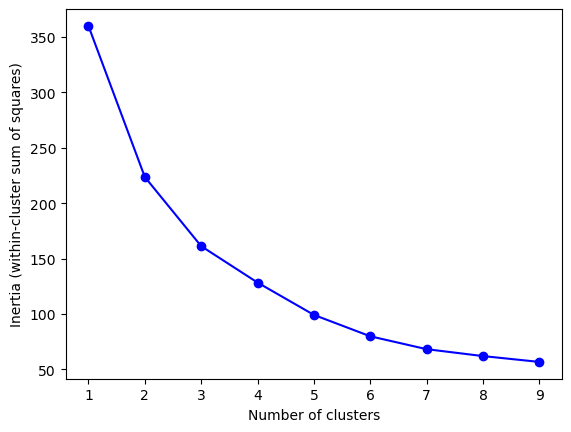

In [15]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [16]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.2893804348309
cluster centers:  [[ 1.22973303 -0.68496051 -0.94125294]
 [ 0.16803028 -0.59729967  0.69048743]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 0 1 2 1 1 1 2 0 1 0 1 2 0 2 1 0 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 0 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualize the result (3D plot)

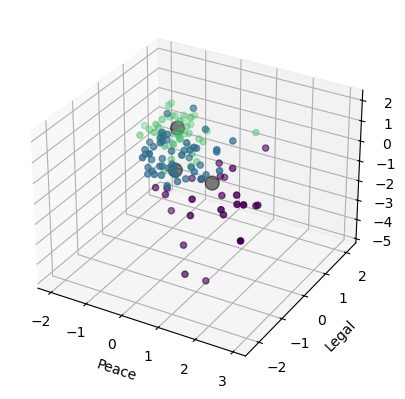

In [17]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

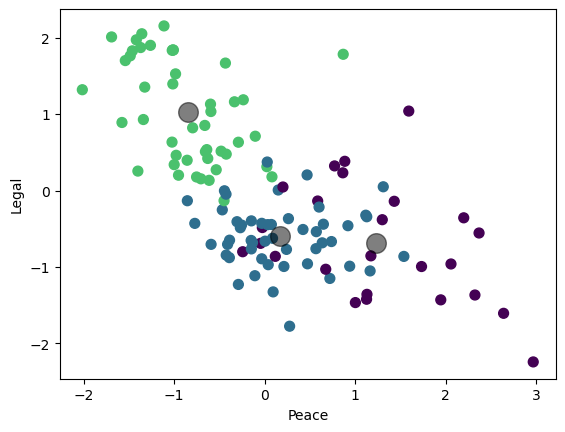

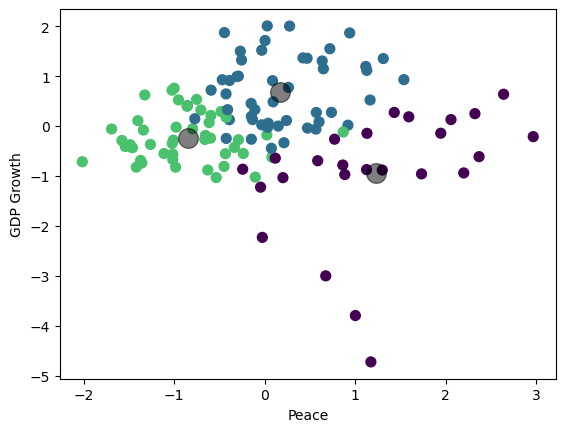

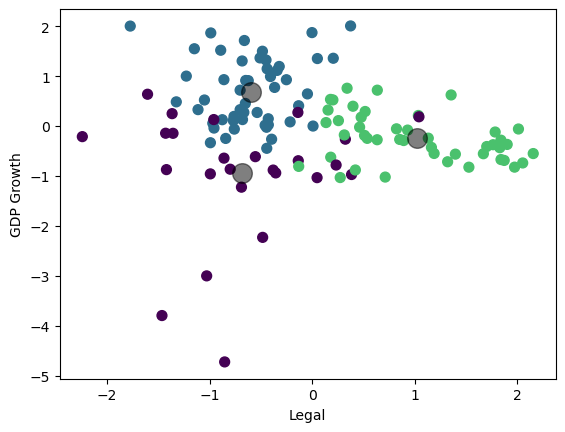

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

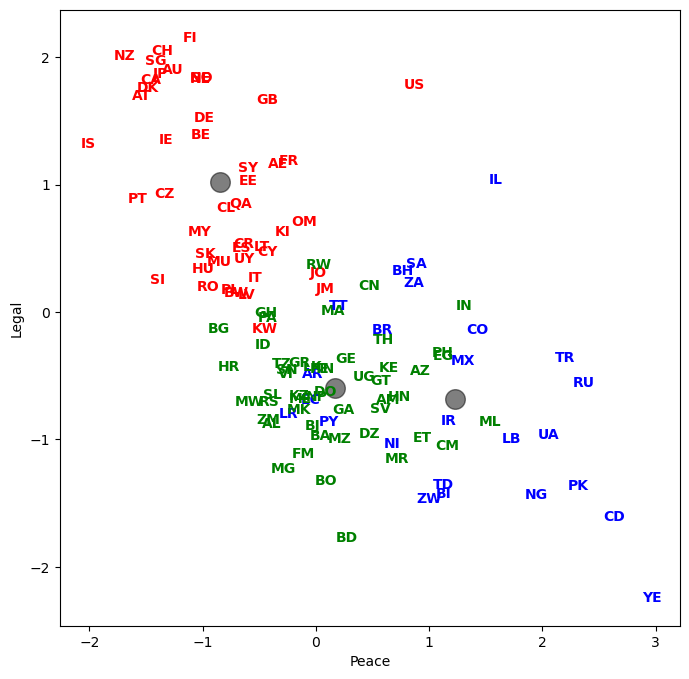

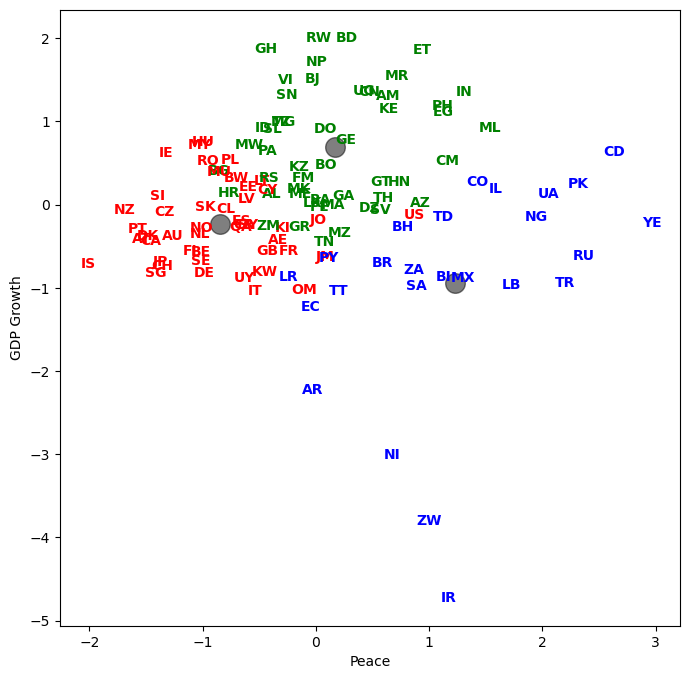

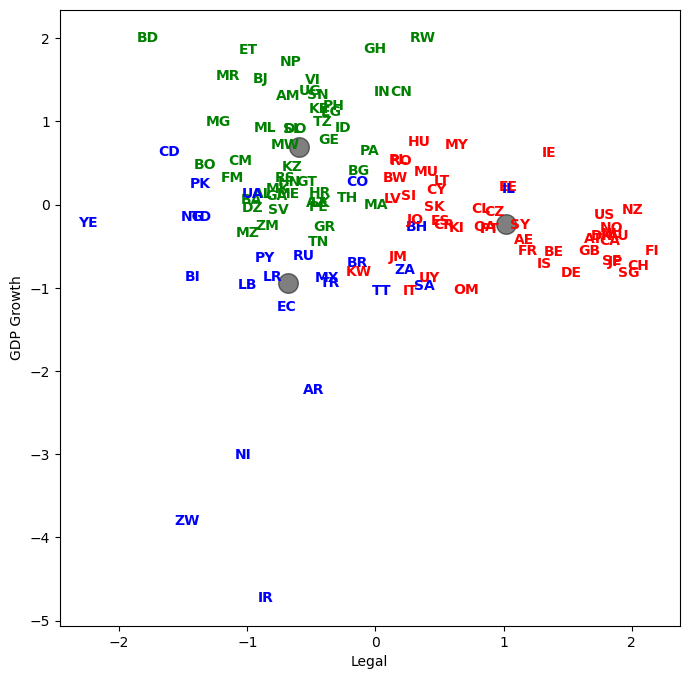

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [20]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
50                         Israel     IL      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
27   Democratic Republic of Congo     CD      0
81                       Pakistan     PK      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
83                       Paraguay     PY      0
22                       Colombia     CO      0
120                      Zimbabwe     ZW

In [21]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.350913952385216
For n_clusters= 3 The average silhouette_score is : 0.35287972873953516
For n_clusters= 4 The average silhouette_score is : 0.35803162957185686
For n_clusters= 5 The average silhouette_score is : 0.34003870612236925
For n_clusters= 6 The average silhouette_score is : 0.34771309340459694
For n_clusters= 7 The average silhouette_score is : 0.3576330759244459
For n_clusters= 8 The average silhouette_score is : 0.35188280755218165
For n_clusters= 9 The average silhouette_score is : 0.33045952895683695
For n_clusters= 10 The average silhouette_score is : 0.3266381895688866


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [22]:
#n_init=2
kmeans1 = KMeans(n_clusters=k, random_state=1, n_init=2)
kmeans1.fit(X)
print("inertia for k=3 is", kmeans1.inertia_)
print("cluster centers: ", kmeans1.cluster_centers_)
y1 = kmeans1.labels_
print("cluster labels: ", y1)    

inertia for k=3 is 161.2893804348309
cluster centers:  [[ 1.22973303 -0.68496051 -0.94125294]
 [ 0.16803028 -0.59729967  0.69048743]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 0 1 2 1 1 1 2 0 1 0 1 2 0 2 1 0 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 0 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


In [23]:
result1 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label n_init = 2': y1})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result1.sort_values('Label n_init = 2'))
    

                          Country Abbrev  Label n_init = 2
60                        Lebanon     LB                 0
30                        Ecuador     EC                 0
48                           Iran     IR                 0
50                         Israel     IL                 0
61                        Liberia     LR                 0
69                         Mexico     MX                 0
77                      Nicaragua     NI                 0
78                        Nigeria     NG                 0
27   Democratic Republic of Congo     CD                 0
81                       Pakistan     PK                 0
90                         Russia     RU                 0
92                   Saudi Arabia     SA                 0
99                   South Africa     ZA                 0
108           Trinidad and Tobago     TT                 0
110                        Turkey     TR                 0
112                       Ukraine     UA                

In [24]:
high_risk = result1.loc[result1['Label n_init = 2'] == 0]['Country']
count = 0
for item in high_risk:
    count +=1
print("number of high risk countries: ", count)

moderate_risk = result1.loc[result1['Label n_init = 2'] == 1]['Country']
count1 = 0
for item in moderate_risk:
    count1 +=1
print("number of moderate risk countries: ", count1)

low_risk = result1.loc[result1['Label n_init = 2'] == 2]['Country']
count2 = 0
for item in low_risk:
    count2 +=1
print("number of low risk countries: ", count2)


number of high risk countries:  25
number of moderate risk countries:  50
number of low risk countries:  46


In [25]:
#n_init=20
kmeans2 = KMeans(n_clusters=k, random_state=1, n_init=20)
kmeans2.fit(X)
print("inertia for k=3 is", kmeans2.inertia_)
print("cluster centers: ", kmeans2.cluster_centers_)
y2 = kmeans2.labels_
print("cluster labels: ", y2)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 1 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


In [26]:
result2 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label n_init = 20': y2})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result2.sort_values('Label n_init = 20'))
    

                          Country Abbrev  Label n_init = 20
60                        Lebanon     LB                  0
30                        Ecuador     EC                  0
48                           Iran     IR                  0
61                        Liberia     LR                  0
69                         Mexico     MX                  0
77                      Nicaragua     NI                  0
78                        Nigeria     NG                  0
81                       Pakistan     PK                  0
83                       Paraguay     PY                  0
90                         Russia     RU                  0
92                   Saudi Arabia     SA                  0
99                   South Africa     ZA                  0
108           Trinidad and Tobago     TT                  0
110                        Turkey     TR                  0
112                       Ukraine     UA                  0
118                         Yemen     YE

In [27]:
high_risk = result2.loc[result2['Label n_init = 20'] == 0]['Country']
count = 0
for item in high_risk:
    count +=1
print("number of high risk countries: ", count)

moderate_risk = result2.loc[result2['Label n_init = 20'] == 1]['Country']
count1 = 0
for item in moderate_risk:
    count1 +=1
print("number of moderate risk countries: ", count1)

low_risk = result2.loc[result2['Label n_init = 20'] == 2]['Country']
count2 = 0
for item in low_risk:
    count2 +=1
print("number of low risk countries: ", count2)

number of high risk countries:  22
number of moderate risk countries:  53
number of low risk countries:  46


In [28]:
#n_init=50
kmeans3 = KMeans(n_clusters=k, random_state=1, n_init=50)
kmeans3.fit(X)
print("inertia for k=3 is", kmeans3.inertia_)
print("cluster centers: ", kmeans3.cluster_centers_)
y3 = kmeans3.labels_
print("cluster labels: ", y3)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 1 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


In [29]:
result3 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label n_init = 50': y3})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result3.sort_values('Label n_init = 50'))

                          Country Abbrev  Label n_init = 50
60                        Lebanon     LB                  0
30                        Ecuador     EC                  0
48                           Iran     IR                  0
61                        Liberia     LR                  0
69                         Mexico     MX                  0
77                      Nicaragua     NI                  0
78                        Nigeria     NG                  0
81                       Pakistan     PK                  0
83                       Paraguay     PY                  0
90                         Russia     RU                  0
92                   Saudi Arabia     SA                  0
99                   South Africa     ZA                  0
108           Trinidad and Tobago     TT                  0
110                        Turkey     TR                  0
112                       Ukraine     UA                  0
118                         Yemen     YE

In [30]:
high_risk = result3.loc[result3['Label n_init = 50'] == 0]['Country']
count = 0
for item in high_risk:
    count +=1
print("number of high risk countries: ", count)

moderate_risk = result3.loc[result3['Label n_init = 50'] == 1]['Country']
count1 = 0
for item in moderate_risk:
    count1 +=1
print("number of moderate risk countries: ", count1)

low_risk = result3.loc[result3['Label n_init = 50'] == 2]['Country']
count2 = 0
for item in low_risk:
    count2 +=1
print("number of low risk countries: ", count2)

number of high risk countries:  22
number of moderate risk countries:  53
number of low risk countries:  46


In [31]:
#n_init=100
kmeans4 = KMeans(n_clusters=k, random_state=1, n_init=100)
kmeans4.fit(X)
print("inertia for k=3 is", kmeans4.inertia_)
print("cluster centers: ", kmeans4.cluster_centers_)
y4 = kmeans4.labels_
print("cluster labels: ", y4)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 1 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


In [32]:
result4 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label n_init = 100': y4})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result4.sort_values('Label n_init = 100'))
    

                          Country Abbrev  Label n_init = 100
60                        Lebanon     LB                   0
30                        Ecuador     EC                   0
48                           Iran     IR                   0
61                        Liberia     LR                   0
69                         Mexico     MX                   0
77                      Nicaragua     NI                   0
78                        Nigeria     NG                   0
81                       Pakistan     PK                   0
83                       Paraguay     PY                   0
90                         Russia     RU                   0
92                   Saudi Arabia     SA                   0
99                   South Africa     ZA                   0
108           Trinidad and Tobago     TT                   0
110                        Turkey     TR                   0
112                       Ukraine     UA                   0
118                     

In [33]:
high_risk = result4.loc[result4['Label n_init = 100'] == 0]['Country']
count = 0
for item in high_risk:
    count +=1
print("number of high risk countries: ", count)

moderate_risk = result4.loc[result4['Label n_init = 100'] == 1]['Country']
count1 = 0
for item in moderate_risk:
    count1 +=1
print("number of moderate risk countries: ", count1)

low_risk = result4.loc[result4['Label n_init = 100'] == 2]['Country']
count2 = 0
for item in low_risk:
    count2 +=1
print("number of low risk countries: ", count2)

number of high risk countries:  22
number of moderate risk countries:  53
number of low risk countries:  46


In [34]:
results_1_to_4 = [result1, result2, result3, result4]

result_com_n_int = result
for item in results_1_to_4:
    result_com_n_int = pd.merge(result_com_n_int, item)

result_com_n_int

,Country,Abbrev,Label,Label n_init = 2,Label n_init = 20,Label n_init = 50,Label n_init = 100
0,Albania,AL,1,1,1,1,1
1,Algeria,DZ,1,1,1,1,1
2,Argentina,AR,0,0,0,0,0
3,Armenia,AM,1,1,1,1,1
4,Australia,AU,2,2,2,2,2
...,...,...,...,...,...,...,...
116,Uruguay,UY,2,2,2,2,2
117,Vietnam,VI,1,1,1,1,1
118,Yemen,YE,0,0,0,0,0
119,Zambia,ZM,1,1,1,1,1


In [35]:
X1 = raw[['Peace', 'Legal', 'GDP Growth', 'Corruption']]
X1 = (X1 - X1.mean()) / X1.std()
X1.head()

,Peace,Legal,GDP Growth,Corruption
0,-0.390081,-0.878158,0.126952,-0.633230
1,0.472352,-0.958948,-0.040772,-0.633230
2,-0.026039,-0.484397,-2.230541,-0.098542
3,0.634871,-0.684553,1.303747,-0.258948
4,-1.261182,1.900001,-0.368418,1.612460


In [36]:
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X1)
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)
y_X1 = kmeans.labels_
print("cluster labels: ", y_X1)

result_X1 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label 4 features': y_X1})
result_com_4_features = pd.merge(result_X1, result)
result_com_4_features.rename(columns = {'Label 4 features' : 'Label 4 features', 'Label n_init = 10' : 'Label 3 features'}, inplace = True)
result_com_4_features

inertia for k=3 is 194.4046655009297
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464 -0.88356071]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [-0.89877793  1.12417837 -0.26007806  1.17949284]]
cluster labels:  [1 1 0 1 2 2 1 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 1 2 1 1 0 2 1 2 1 2 1 1 1 2 1 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 1 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Country,Abbrev,Label 4 features,Label
0,Albania,AL,1,1
1,Algeria,DZ,1,1
2,Argentina,AR,0,0
3,Armenia,AM,1,1
4,Australia,AU,2,2
...,...,...,...,...
116,Uruguay,UY,2,2
117,Vietnam,VI,1,1
118,Yemen,YE,0,0
119,Zambia,ZM,1,1


In [37]:
#linkage = 'ward'

model1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
model1.fit(X)
labels1 = model1.labels_
print("cluster labels: ", labels1)
result_model1_cluster = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label linkage=ward': labels1})


cluster labels:  [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 2 1 0 0 1 0 1 1 2 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 0 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 2 0 0 0 0
 0 1 1 2 2 1 0 2 0 0 0 0 0 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 2
 0 2 1 1 0 0 0 2 0 2]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
#linkage = 'complete'

model2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
model2.fit(X)
labels2 = model2.labels_
print("cluster labels: ", labels2)
result_model2_cluster = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label linkage=complete': labels2})

cluster labels:  [0 0 0 2 0 0 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0
 0 2 0 0 0 2 2 0 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0
 2 0 0 1 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2
 2 2 0 0 0 0 2 2 0 1]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
#linkage = 'average'

model3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
model3.fit(X)
labels3 = model3.labels_
print("cluster labels: ", labels3)
result_model3_cluster = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label linkage=average': labels3})

cluster labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 0 2 0 1]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [40]:
#linkage = 'single'
model4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
model4.fit(X)
labels4 = model4.labels_
print("cluster labels: ", labels4)

result_model4_cluster = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label linkage = single': labels4})

cluster labels:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 0]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
results_model_1_to_4 = [result_model1_cluster, result_model2_cluster, result_model3_cluster, result_model4_cluster]

result_com_linkage = result
for item in results_model_1_to_4:
    result_com_linkage = pd.merge(result_com_linkage, item)

result_com_linkage.head()

,Country,Abbrev,Label,Label linkage=ward,Label linkage=complete,Label linkage=average,Label linkage = single
0,Albania,AL,1,0,0,0,2
1,Algeria,DZ,1,0,0,0,2
2,Argentina,AR,0,0,0,1,2
3,Armenia,AM,1,0,2,0,2
4,Australia,AU,2,1,0,0,2


In [42]:

a = sum(result_com_linkage['Label linkage=ward'] == 2.0)
print("number of high risk countries (linkage=ward): ", a)

b = sum(result_com_linkage['Label linkage=complete'] == 2.0)
print("number of high risk countries (linkage=complete): ", b)

d = sum(result_com_linkage['Label linkage=average'] == 2.0)
print("number of high risk countries (linkage=average): ", d)

e = sum(result_com_linkage['Label linkage = single'] == 2.0)
print("number of high risk countries (linkage=single): ", e)

f = sum(result_com_linkage['Label'] == 2.0)
print("number of high risk countries (k-means): ", f)

number of high risk countries (linkage=ward):  14
number of high risk countries (linkage=complete):  37
number of high risk countries (linkage=average):  11
number of high risk countries (linkage=single):  116
number of high risk countries (k-means):  46


In [43]:
#PART E

ven = pd.DataFrame({'Country': ['Venezuela'],
                    'Abbrev' : ['VE'],
                    'Corruption' : [16],
                    'Peace': [2.671],
                    'Legal': [2.895],
                    'GDP Growth': [-35]})

raw_ven = pd.concat([ven, raw],  ignore_index = True, axis = 0)
raw_ven.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Venezuela,VE,16,2.671,2.895,-35.000
1,Albania,AL,35,1.821,4.546,2.983
2,Algeria,DZ,35,2.219,4.435,2.553
3,Argentina,AR,45,1.989,5.087,-3.061
4,Armenia,AM,42,2.294,4.812,6.000


In [44]:
X_ven = raw_ven[['Peace', 'Legal', 'GDP Growth']]
X_ven = (X_ven - X_ven.mean()) / X_ven.std()
print(X_ven.head(5))

      Peace     Legal  GDP Growth
0  1.433454 -2.035285   -8.768659
1 -0.400182 -0.849636    0.148881
2  0.458391 -0.929350    0.047927
3 -0.037769 -0.461122   -1.270112
4  0.620183 -0.658611    0.857204


In [45]:
k = 3
kmeans_ven = KMeans(n_clusters=k, random_state=1)
kmeans_ven.fit(X_ven)
print("inertia for k=3 with Venezuela is", kmeans_ven.inertia_)
print("cluster centers: ", kmeans_ven.cluster_centers_)
y_ven = kmeans_ven.labels_
result_ven = pd.DataFrame({'Country':raw_ven['Country'], 'Abbrev':raw_ven['Abbrev'], 'Label kmeans_ven':y_ven})

inertia for k=3 with Venezuela is 147.35815961158318
cluster centers:  [[-0.9090402   1.05949011 -0.05031098]
 [ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


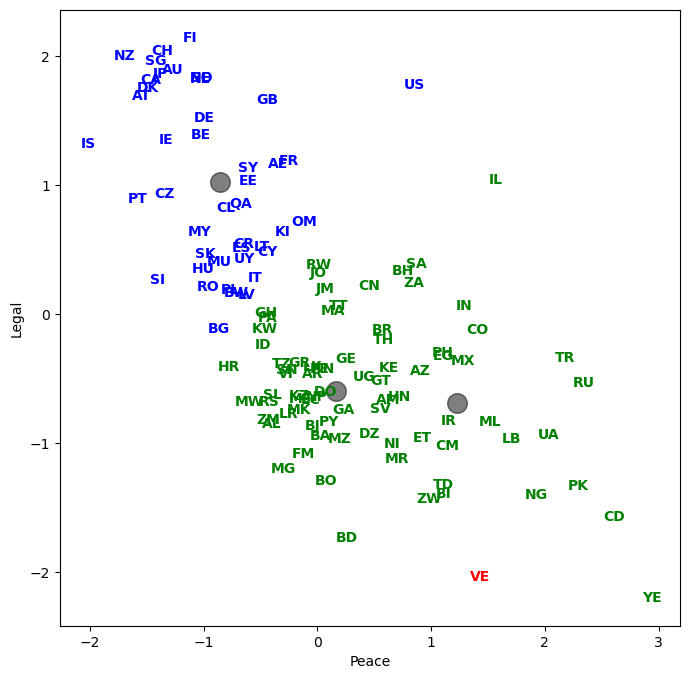

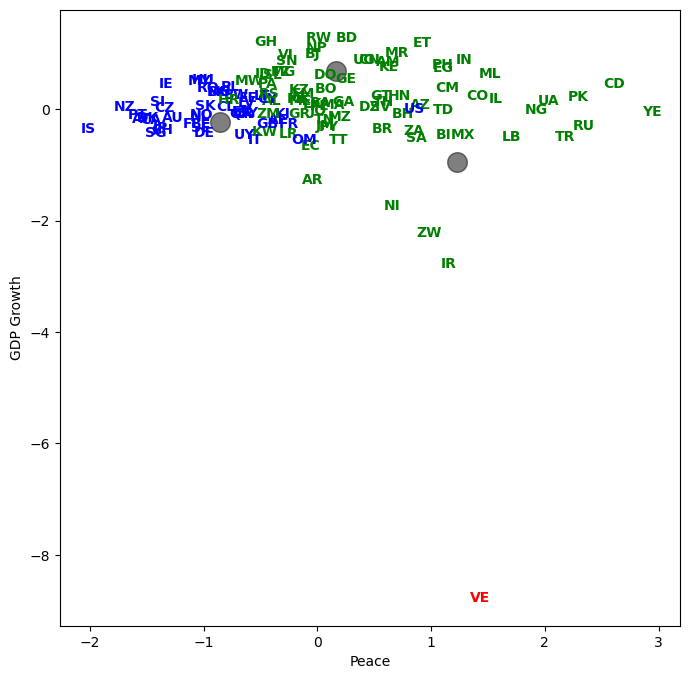

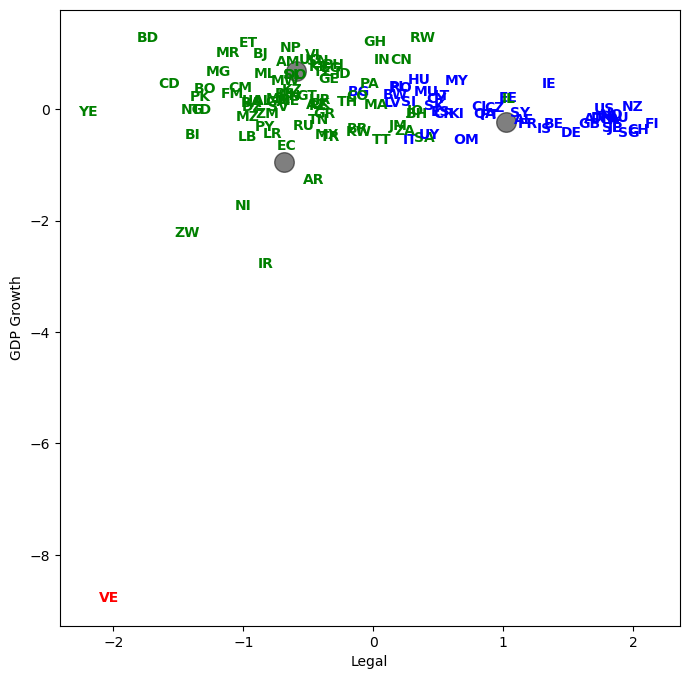

In [46]:
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X_ven.iloc[:, x_1], X_ven.iloc[:, x_2], c=y_ven, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X_ven.shape[0]):
        plt.text(X_ven.iloc[j, x_1], X_ven.iloc[j, x_2], raw_ven['Abbrev'].iloc[j], 
                 color=colors[y_ven[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [47]:
# AgglomerativeClustering with Venezuela, three features, linkage = ward
model_agg_ven = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
model_agg_ven.fit(X_ven)
labels_agg_ward_ven = model_agg_ven.labels_
result_agg_ward_ven = pd.DataFrame({'Country':raw_ven['Country'], 'Abbrev':raw_ven['Abbrev'], 'Label agg_ward_ven': labels_agg_ward_ven})

# AgglomerativeClustering with Venezuela, three features, linkage = single
model_agg_single_ven = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
model_agg_single_ven.fit(X_ven)
labels_agg_single_ven = model_agg_single_ven.labels_
result_agg_single_ven = pd.DataFrame({'Country':raw_ven['Country'], 'Abbrev':raw_ven['Abbrev'], 'Label agg_single_ven': labels_agg_single_ven})

# AgglomerativeClustering with Venezuela, three features, linkage = average
model_agg_average_ven = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
model_agg_average_ven.fit(X_ven)
labels_agg_average_ven = model_agg_average_ven.labels_
result_agg_average_ven = pd.DataFrame({'Country':raw_ven['Country'], 'Abbrev':raw_ven['Abbrev'], 'Label agg_average_ven': labels_agg_average_ven})

# AgglomerativeClustering with Venezuela, three features, linkage = complete
model_agg_complete_ven = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
model_agg_complete_ven.fit(X_ven)
labels_agg_complete_ven = model_agg_complete_ven.labels_
result_agg_complete_ven = pd.DataFrame({'Country':raw_ven['Country'], 'Abbrev':raw_ven['Abbrev'], 'Label agg_complete_ven': labels_agg_complete_ven})


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
# AgglomerativeClustering with and without Venezuela, KMeans with and without Venezuela

# drop Venezuela 
results_agg_ward_com = pd.merge(result_agg_ward_ven.iloc[1:], result_model1_cluster)
results_agg_complete_com = pd.merge(result_agg_complete_ven.iloc[1:], result_model2_cluster)
results_agg_average_com = pd.merge(result_agg_average_ven.iloc[1:], result_model3_cluster)
results_agg_single_com = pd.merge(result_agg_single_ven.iloc[1:], result_model4_cluster)
results_kmeans_com = pd.merge(result, result_ven.iloc[1:])

# KMeans with and without Venezuela
sum(results_kmeans_com['Label'] == results_kmeans_com['Label kmeans_ven'])


new_a = sum(results_agg_ward_com['Label agg_ward_ven'] == results_agg_ward_com['Label linkage=ward'])
print("number of high risk countries (linkage=ward) after update: ", new_a)

new_b = sum(results_agg_complete_com['Label agg_complete_ven'] == results_agg_complete_com['Label linkage=complete'])
print("number of high risk countries (linkage=complete) after update: ", new_b)

new_d = sum(results_agg_average_com['Label agg_average_ven'] == results_agg_average_com['Label linkage=average'])
print("number of high risk countries (linkage=average) after update: ", new_d)

new_e = sum(results_agg_single_com['Label agg_single_ven'] == results_agg_single_com['Label linkage = single'])
print("number of high risk countries (linkage=single) after update: ", new_e)

new_f = sum(results_kmeans_com['Label'] == results_kmeans_com['Label kmeans_ven'])
print("number of high risk countries (k-means) after update: ", new_f)

number of high risk countries (linkage=ward) after update:  86
number of high risk countries (linkage=complete) after update:  28
number of high risk countries (linkage=average) after update:  106
number of high risk countries (linkage=single) after update:  116
number of high risk countries (k-means) after update:  49
